In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
house_price = pd.read_csv("C:\\Users\\TAM NHU\\Downloads\\housing.csv")
house_price.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [22]:
house_price.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

In [23]:
house_price.shape

(20640, 10)

In [24]:
house_price.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [25]:
house_price['total_bedrooms'] = house_price.groupby('ocean_proximity')['total_bedrooms'].transform(
    lambda x: x.fillna(x.mean())
)

print(house_price.isna().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         496         177         7.2574              352100   
3         558         219         5.6431              341300   
4         565         259         3.8462              342200   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1     

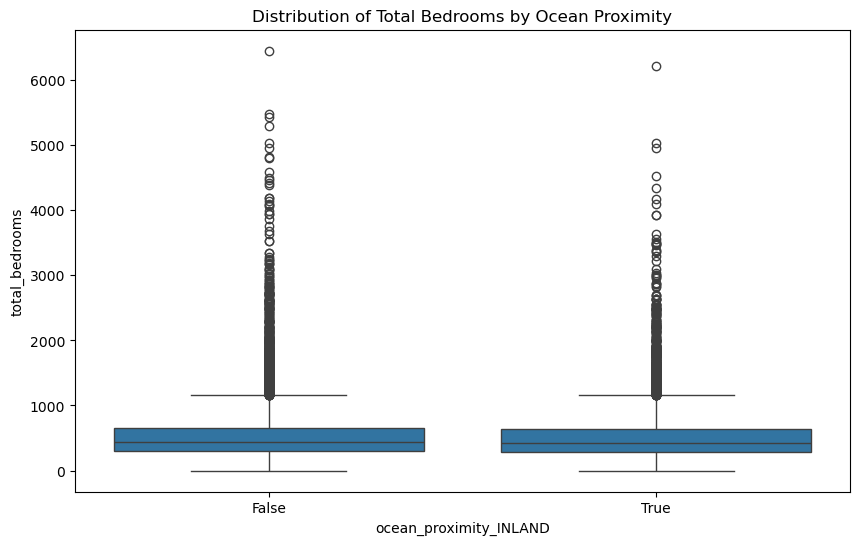

In [26]:
house_price = pd.get_dummies(house_price, columns=['ocean_proximity'], drop_first=True)

print(house_price.head())

grouped_stats = house_price.groupby(['ocean_proximity_INLAND', 
                                     'ocean_proximity_ISLAND',
                                     'ocean_proximity_NEAR BAY', 
                                     'ocean_proximity_NEAR OCEAN'])['total_bedrooms'].describe()
print(grouped_stats)

plt.figure(figsize=(10,6))
sns.boxplot(data=house_price, x='ocean_proximity_INLAND', y='total_bedrooms')  # Choose one of the encoded columns
plt.title('Distribution of Total Bedrooms by Ocean Proximity')
plt.show()


In [27]:
# Kiểm tra thông tin cơ bản về dữ liệu
house_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  int64  
 3   total_rooms                 20640 non-null  int64  
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  int64  
 6   households                  20640 non-null  int64  
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  int64  
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(4), int64(5

In [28]:
house_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.880892,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.267735,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [29]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

scaler = StandardScaler()

house_price[columns_to_scale] = scaler.fit_transform(house_price[columns_to_scale])

print(house_price[columns_to_scale].head())

   total_rooms  total_bedrooms  population  households  median_income
0    -0.804819       -0.975250   -0.974429   -0.977033       2.344766
1     2.045890        1.355060    0.861439    1.669961       2.332238
2    -0.535746       -0.829755   -0.820777   -0.843637       1.782699
3    -0.624215       -0.722422   -0.766028   -0.733781       0.932968
4    -0.462404       -0.615089   -0.759847   -0.629157      -0.012881


In [30]:
house_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,20640.000000
mean,-119.569704,35.631861,28.639486,3.201573e-17,1.101617e-17,-1.101617e-17,6.885104e-17,6.609700e-17,206855.816909
std,2.003532,2.135952,12.585558,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,115395.615874
min,-124.350000,32.540000,1.000000,-1.207283e+00,-1.280551e+00,-1.256123e+00,-1.303984e+00,-1.774299e+00,14999.000000
25%,-121.800000,33.930000,18.000000,-5.445698e-01,-5.745415e-01,-5.638089e-01,-5.742294e-01,-6.881186e-01,119600.000000
50%,-118.490000,34.260000,29.000000,-2.332104e-01,-2.382328e-01,-2.291318e-01,-2.368162e-01,-1.767951e-01,179700.000000
75%,-118.010000,37.710000,37.000000,2.348028e-01,2.513231e-01,2.644949e-01,2.758427e-01,4.593063e-01,264725.000000
max,-114.310000,41.950000,52.000000,1.681558e+01,1.408947e+01,3.025033e+01,1.460152e+01,5.858286e+00,500001.000000


In [31]:
print(house_price.columns)


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


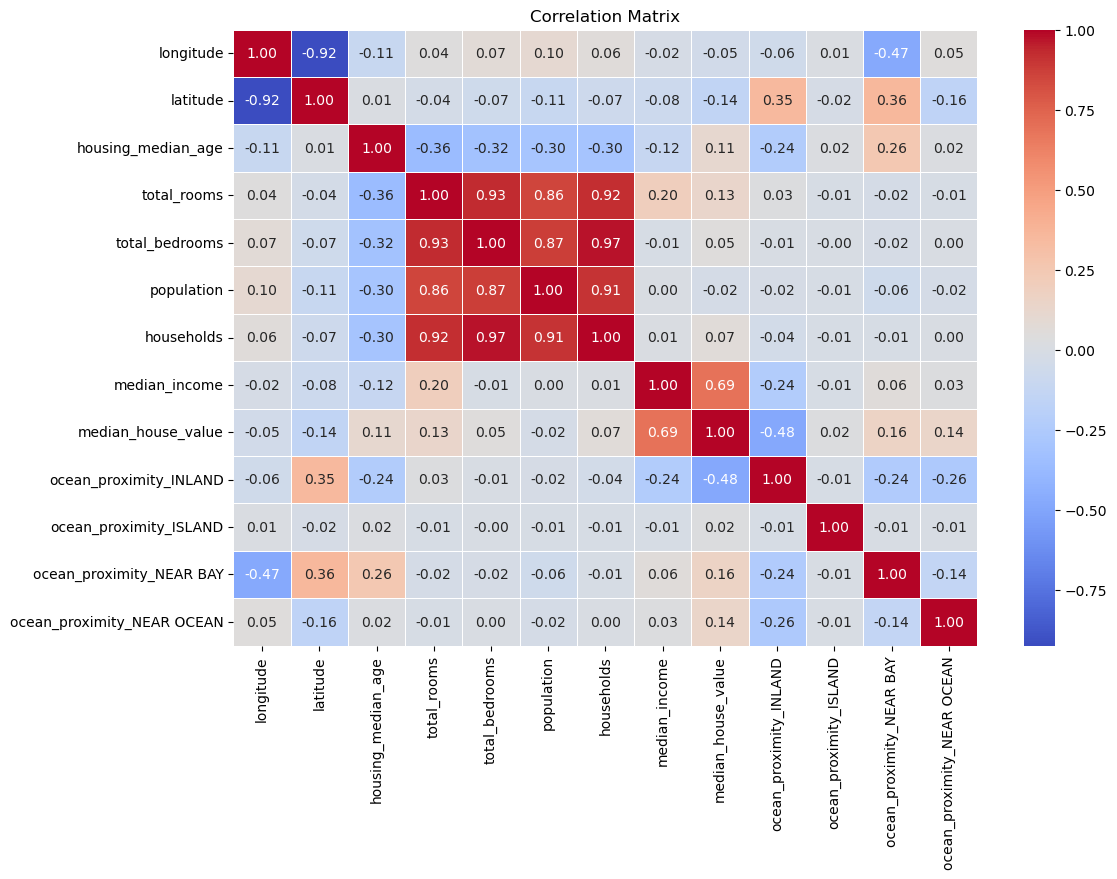

In [32]:
numeric_columns = house_price.select_dtypes(include=['float64', 'int64', 'bool'])

correlation_matrix = numeric_columns.corr()

#Correlation 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

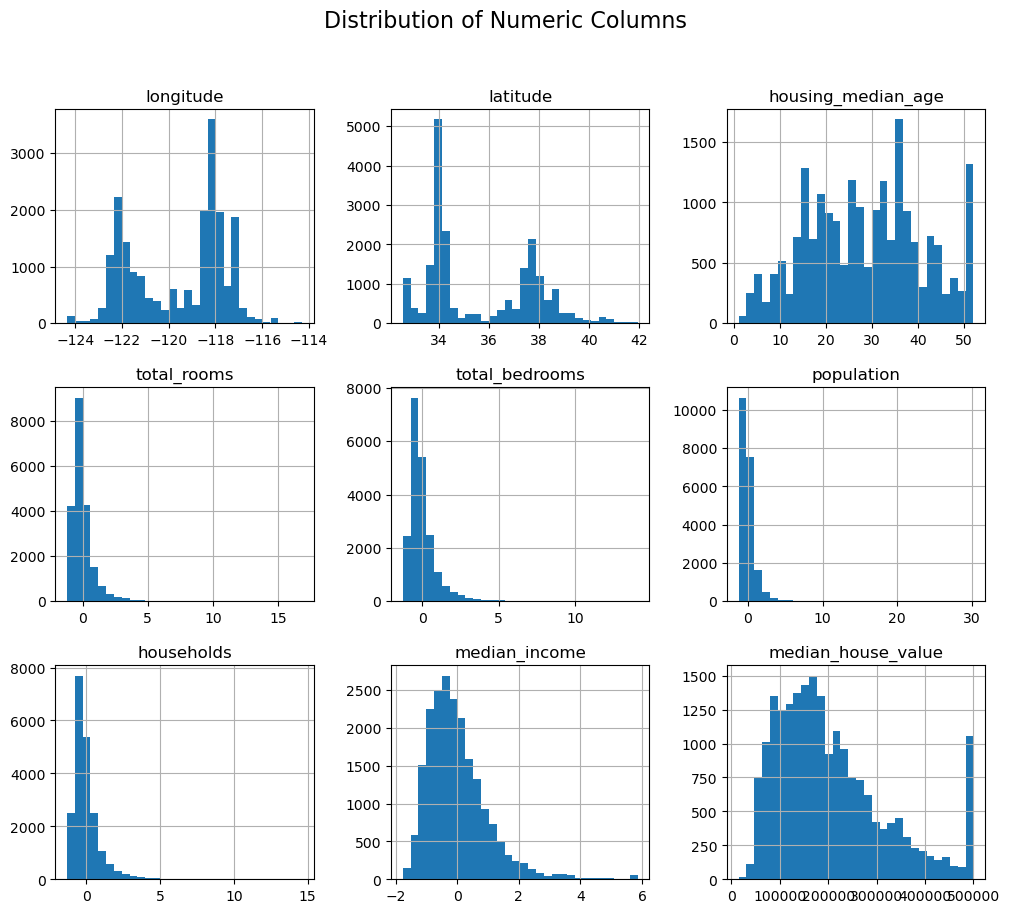

In [33]:
house_price.hist(figsize=(12, 10), bins=30)
plt.suptitle('Distribution of Numeric Columns', fontsize=16)
plt.show()

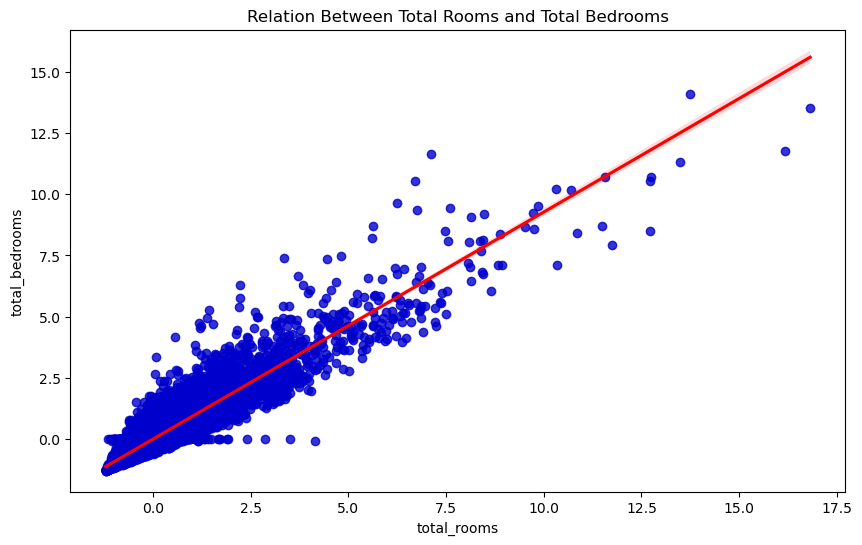

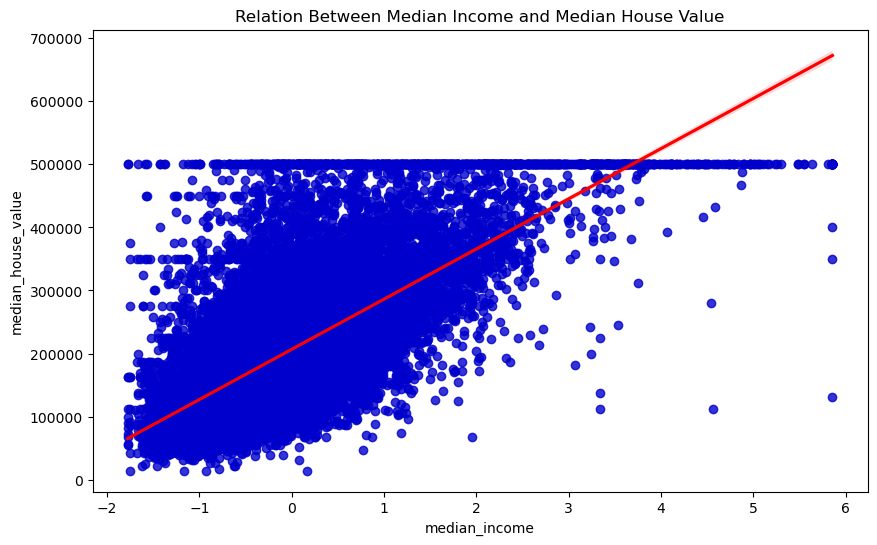

In [34]:

plt.figure(figsize=(10, 6))
sns.regplot(data=house_price, x='total_rooms', y='total_bedrooms', scatter_kws={'color': '#0000CC'}, line_kws={'color': 'red'})
plt.title('Relation Between Total Rooms and Total Bedrooms')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=house_price, x='median_income', y='median_house_value', scatter_kws={'color': '#0000CC'}, line_kws={'color': 'red'})
plt.title('Relation Between Median Income and Median House Value')
plt.show()

In [35]:
#linear regression
# Chạy mô hình với tất cả các đặc trưng
X_all = house_price.drop(columns=["median_house_value"])  # Drop only the target variable
y_all = house_price['median_house_value']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

model_all = LinearRegression()
model_all.fit(X_train_all, y_train_all)  

y_pred_all = model_all.predict(X_test_all)

mae_all = mean_absolute_error(y_test_all, y_pred_all)
mse_all = mean_squared_error(y_test_all, y_pred_all)
r2_all = r2_score(y_test_all, y_pred_all)

print(f"Linear All Features - MAE: {mae_all}")
print(f"Linear All Features - MSE: {mse_all}")
print(f"Linear All Features - R-squared: {r2_all}")

Linear All Features - MAE: 50704.38262926208
Linear All Features - MSE: 4904902402.998749
Linear All Features - R-squared: 0.6256968256137014


In [ ]:
#random forest
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R-squared: {rf_r2}")